# Stock price prediction - Practise session

### Source:
* https://medium.com/mlreview/a-simple-deep-learning-model-for-stock-price-prediction-using-tensorflow-30505541d877
* https://github.com/sebastianheinz/stockprediction

### WARNING: Tensorflow version 1.15.0 was used for this analysis

In [1]:
import os
import sys

# Add path for python to look into for libraries installed using pip

sys.path.append('/usr/local/lib/python3.7/site-packages')
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

print('Present working directory:', os.getcwd())

Present working directory: /Users/maosa/algothon2019/practise


In [2]:
# Import data

data = pd.read_csv('data_stocks.csv')

data.shape

(41266, 502)

In [3]:
data.iloc[:, :10].head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60


In [4]:
# Drop date variable

data.drop(['DATE'], 1, inplace=True)

# Dataset dimensions

n = data.shape[0]

p = data.shape[1]

# Make data a np.array

data = data.values

# Training and test data

train_start = 0
train_end = int(np.floor(0.8*n))

test_start = train_end + 1
test_end = n

data_train = data[np.arange(train_start, train_end), :]

data_test = data[np.arange(test_start, test_end), :]

In [5]:
# Scale data

# Most neural network architectures benefit from scaling the inputs (sometimes also the output).
# Why? Because most common activation functions of the network’s neurons such as
# tanh or sigmoid are defined on the [-1, 1] or [0, 1] interval respectively.
# Nowadays, rectified linear unit (ReLU) activations are commonly used activations
# which are unbounded on the axis of possible activation values.
# However, we will scale both the inputs and targets anyway.

# Caution must be undertaken regarding what part of the data is scaled and when.
# A common mistake is to scale the whole dataset before training and test split are being applied.
# Why is this a mistake? Because scaling invokes the calculation of statistics e.g. the min/max of a variable.
# When performing time series forecasting in real life, you do not have information
# from future observations at the time of forecasting.
# Therefore, calculation of scaling statistics has to be conducted on training data and
# must then be applied to the test data.
# Otherwise, you use future information at the time of forecasting which
# commonly biases forecasting metrics in a positive direction.

scaler = MinMaxScaler(feature_range=(-1, 1))

scaler.fit(data_train)

data_train = scaler.transform(data_train)

data_test = scaler.transform(data_test)

# Build X and y

X_train = data_train[:, 1:]

y_train = data_train[:, 0]

X_test = data_test[:, 1:]

y_test = data_test[:, 0]

# Number of stocks in training data

n_stocks = X_train.shape[1]

# Neurons

n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128

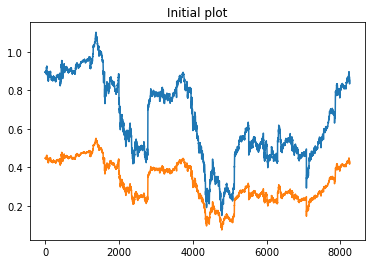

MSE Train:  1.3057566
MSE Test:  4.1026154


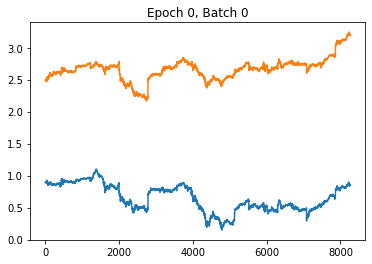

MSE Train:  0.0007237507
MSE Test:  0.04920658


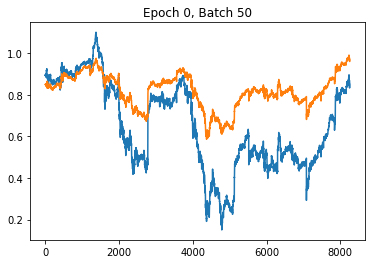

MSE Train:  0.00016829633
MSE Test:  0.044900123


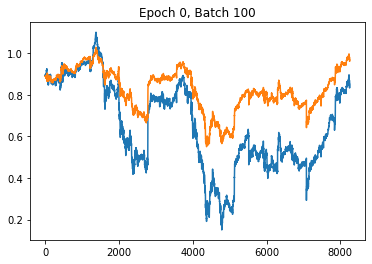

MSE Train:  0.00016661703
MSE Test:  0.03875983


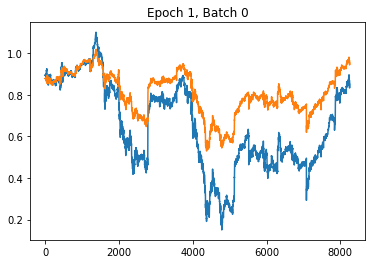

MSE Train:  0.00017395671
MSE Test:  0.03381458


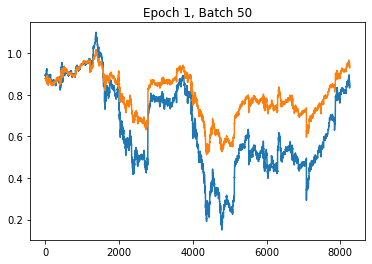

MSE Train:  0.00023619452
MSE Test:  0.032740615


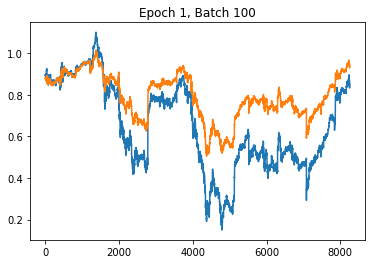

MSE Train:  0.00022423314
MSE Test:  0.031987667


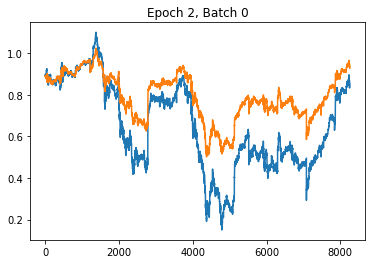

MSE Train:  0.00020054229
MSE Test:  0.026479518


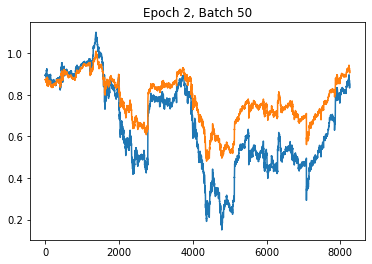

MSE Train:  0.00017473944
MSE Test:  0.029685035


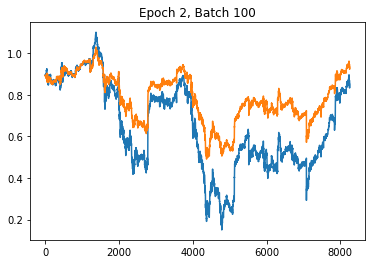

MSE Train:  0.00015515015
MSE Test:  0.028243806


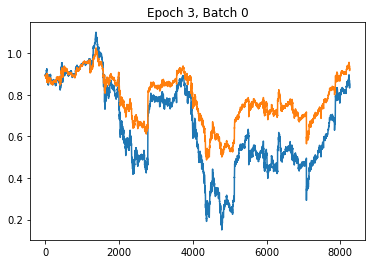

MSE Train:  0.00016048102
MSE Test:  0.023662986


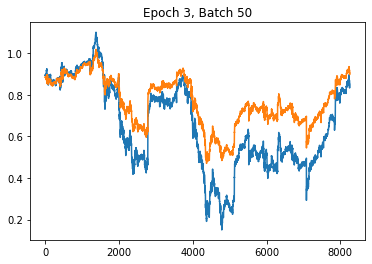

MSE Train:  0.00017691204
MSE Test:  0.023448741


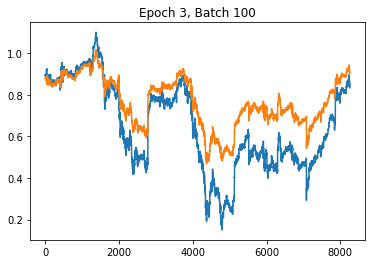

MSE Train:  0.000114221424
MSE Test:  0.028364964


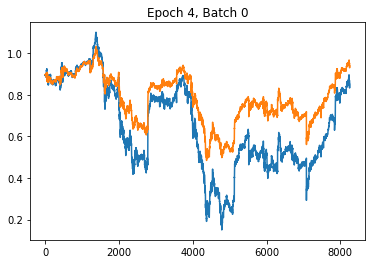

MSE Train:  7.6625314e-05
MSE Test:  0.025533093


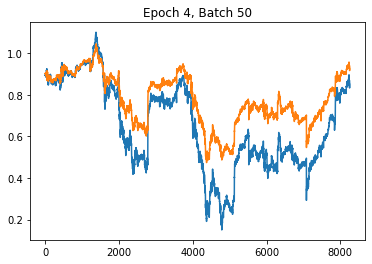

MSE Train:  0.00012434697
MSE Test:  0.029309038


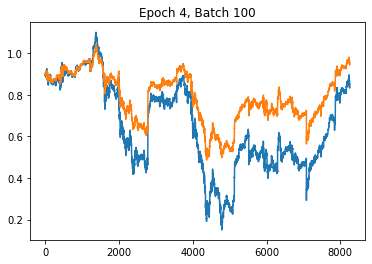

MSE Train:  7.34163e-05
MSE Test:  0.027802827


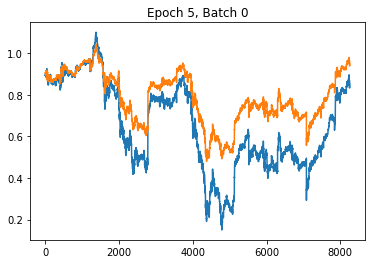

MSE Train:  0.0004228037
MSE Test:  0.018082898


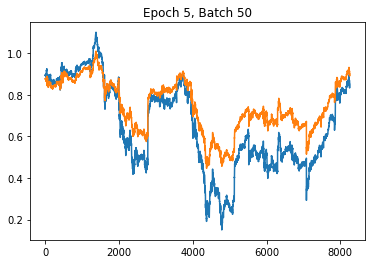

MSE Train:  0.00012239779
MSE Test:  0.019462716


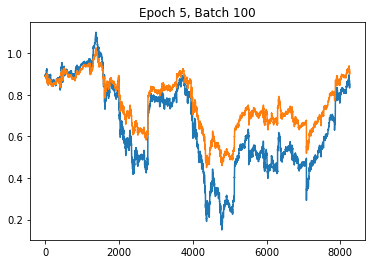

MSE Train:  6.7272835e-05
MSE Test:  0.021201415


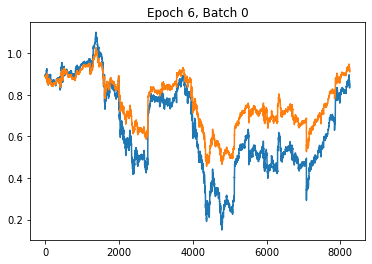

MSE Train:  0.000111873924
MSE Test:  0.025041586


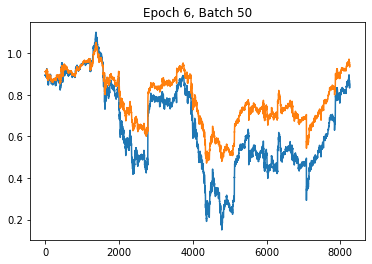

MSE Train:  9.5155476e-05
MSE Test:  0.021061663


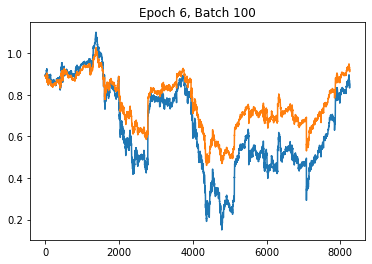

MSE Train:  0.00011380378
MSE Test:  0.020715926


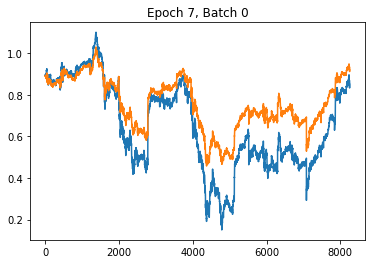

MSE Train:  5.385766e-05
MSE Test:  0.020861331


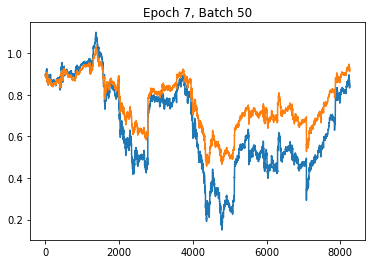

MSE Train:  5.5262484e-05
MSE Test:  0.022091934


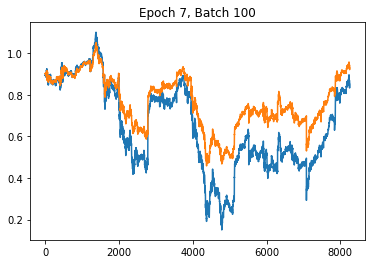

MSE Train:  6.772362e-05
MSE Test:  0.020884788


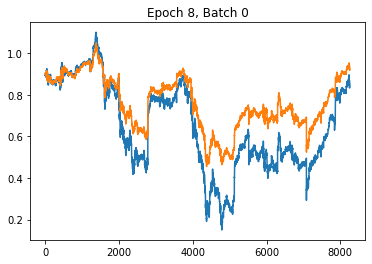

MSE Train:  6.593942e-05
MSE Test:  0.019194948


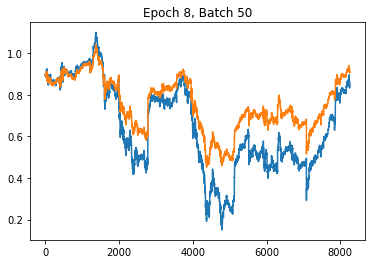

MSE Train:  7.868148e-05
MSE Test:  0.020037401


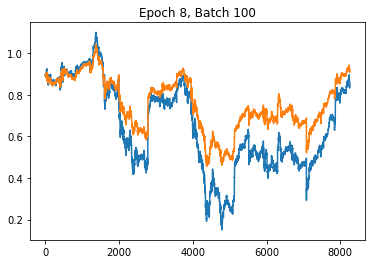

MSE Train:  7.8773686e-05
MSE Test:  0.020235863


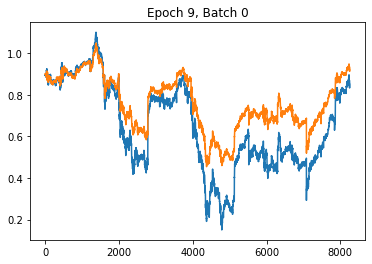

MSE Train:  0.00010957001
MSE Test:  0.019054012


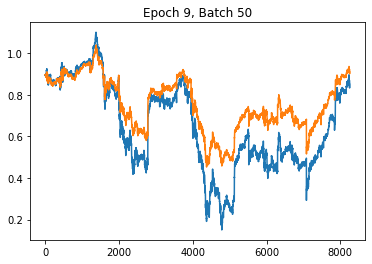

MSE Train:  0.00014873917
MSE Test:  0.01887095


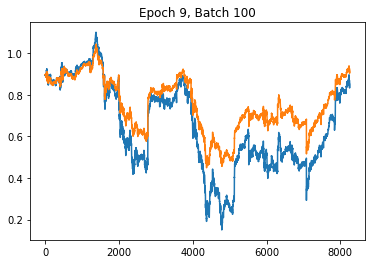

In [6]:
# Session

net = tf.InteractiveSession()

# Placeholder

X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

# Initializers

sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

# Hidden weights

W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Output weights

W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))

# Hidden layer

hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer (transpose!)

out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

# Cost function

mse = tf.reduce_mean(tf.squared_difference(out, Y))

# Optimizer

opt = tf.train.AdamOptimizer().minimize(mse)

# Init

net.run(tf.global_variables_initializer())

# Setup interactive plot

plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test * 0.5)
plt.title('Initial plot')
plt.show()

# Fit neural net

batch_size = 256
mse_train = []
mse_test = []

# Run

epochs = 10

for e in range(epochs):
    
    # Shuffle training data
    
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        
        # Run optimizer with batch
        
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Show progress
        
        if np.mod(i, 50) == 0:
            
            # MSE train and test
            
            mse_train.append(net.run(mse, feed_dict={X: X_train, Y: y_train}))
            mse_test.append(net.run(mse, feed_dict={X: X_test, Y: y_test}))
            print('MSE Train: ', mse_train[-1])
            print('MSE Test: ', mse_test[-1])
            
            # Prediction
            
            pred = net.run(out, feed_dict={X: X_test})
            
            # Plot actual (blue) and predicted (orange) values
            
#             line2.set_ydata(pred[0])
#             plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
#             plt.pause(0.01)
            
            fig = plt.figure()
            ax2 = fig.add_subplot(111)
            line_a = ax2.plot(y_test)
            line_b = ax2.plot(pred[0])
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            plt.show()

In [7]:
# Print final MSE after Training

mse_final = net.run(mse, feed_dict={X: X_test, Y: y_test})

print('MSE final:', mse_final)

MSE final: 0.020251898


In [8]:
tf.InteractiveSession.close(net)